## Rayron Ferreira
- usada para classificar
- resultado sempre 0 ou 1
- modelos que detectam doenças, previsão do tempo, fraudes

In [44]:
# importando libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
dataset = pd.read_excel('./base-compra-imoveis.xlsx', 'Plan1')

dataset.head()

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
0,1,10480,1,2,1
1,2,6182,2,2,1
2,3,6387,3,1,0
3,4,6528,1,2,0
4,5,8269,1,2,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id Cliente     100 non-null    int64
 1   Renda          100 non-null    int64
 2   Tipo Renda     100 non-null    int64
 3   Possui Imóvel  100 non-null    int64
 4   Comprou?       100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


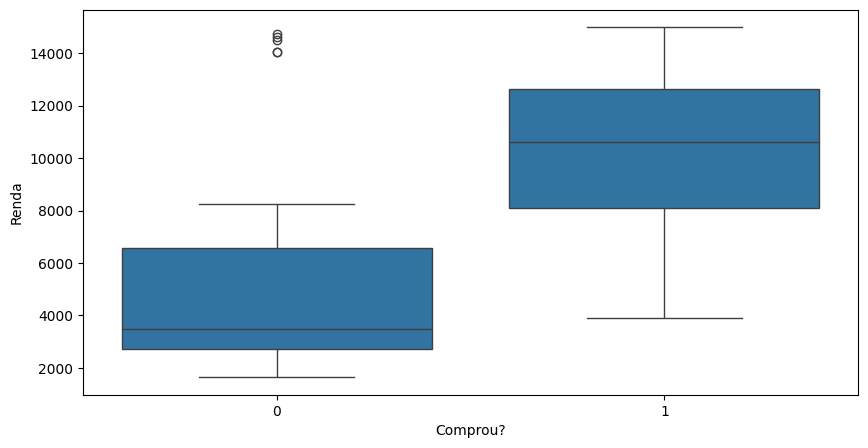

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(data=dataset, x='Comprou?', y='Renda');

In [56]:
# definindo features e resultado do dataset

X = dataset.iloc[:,1:4].values
y = dataset.iloc[:, 4:5].values

scaler = StandardScaler()

#X = scaler.fit_transform(X)
y = y.ravel()


In [57]:
# dividindo dados de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('Treino: ', len(X_train), 'Teste: ', len(X_test))

Treino:  80 Teste:  20


In [58]:
#treinando modelo

model = LogisticRegression(solver='saga', max_iter=1000)

model.fit(X_train, y_train)

/home/rodffer/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='saga')

In [59]:
# matriz confusão

pred = model.predict(X_test)

print('Previsão', pred)
print(' Dataset',y_test)

confusion_matrix(y_test, pred)

Previsão [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 Dataset [0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0]


array([[ 0,  9],
       [ 0, 11]])

In [60]:
print(classification_report(y_test, pred))

# recall -> o quanto esta acertando
# precision -> assertividade do modelo

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.55      1.00      0.71        11

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20



/home/rodffer/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rodffer/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rodffer/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
# previsões

salario = 50000
tipo_renda = 1
possui_imovel = 1

cliente = [[salario, tipo_renda, possui_imovel]]

prev= model.predict(cliente)
prob = model.predict_proba(cliente)

print('Sim: ', prob[0][1])
print('Nao: ', prob[0][0])

Sim:  0.9994546516522399
Nao:  0.0005453483477600995
